## Get the cleaned dataset and selected features

In [ ]:
import os
from pathlib import Path
import pandas as pd

# Load data
path = Path(os.getcwd() + "/..").resolve()
dataset_path = path/'Datasets/Tabular/FOOD-DATA-GROUP.csv'
df = pd.read_csv(dataset_path)

df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"

# Data transformation
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform the data
df_transformed = pt.fit_transform(df)

# Convert back to DataFrame
df = pd.DataFrame(df_transformed, columns=df.columns)

# Remove outliers
from scipy.stats import zscore
import numpy as np

X = df[features]

# Calculate Z-scores for the features
z_scores = np.abs(zscore(X))

# Define a threshold for Z-scores
threshold = 3

# Find rows where all features have Z-scores greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove rows where any feature's Z-score exceeds the threshold
X_clean_zscore = X[~outliers]

# Get the indices of the rows that are not outliers
valid_indices = X[~outliers].index

df = df.loc[valid_indices]

# Selected features
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']
df['Total Fats'] = df['Polyunsaturated Fats'] + df['Saturated Fats'] + df['Monounsaturated Fats']

new_features = ['Protein+Carbohydrates+Fat', 'Total Fats']

selected_features = ['Nutrition Density', 'Zinc', 'Vitamin B3', 'Calcium', 'Sodium', 'Dietary Fiber', 'Vitamin C', 'Selenium', 'Protein+Carbohydrates+Fat', 'Total Fats']

X = df[selected_features]

## Graphical model - Elbow method
The elbow rule is a simple technique to select the number of clusters when using K-Means: just plot the inertia (the mean squared distance from each instance to its nearest centroid) as a function of the number of clusters, and find the point in the curve where the inertia stops dropping fast (the “elbow”)  (Geron, 2022).
We can say that if k increases, the distortion will decrease. This is because the examples will be closer to the centroids they are assigned to. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly (Raschka and Mirjalili, 2019).

### Implement KMeans

In [ ]:
from sklearn.cluster import KMeans

# Generate KMeans model for clusters in range 1 to 7 inclusive and a random generator seed of 42 for reproducibility.
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 8)]

# Extract interia from each KMeans model
inertias = [model.inertia_ for model in kmeans_per_k]

### Plot inertia values

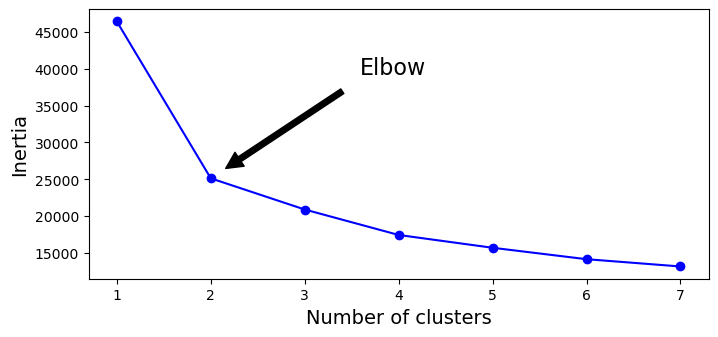

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 8), inertias, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.45, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

As the number of clusters increases from 1 to 7, the inertia values decrease significantly. This trend indicates that adding more clusters allows for better grouping of the data, which leads to lower inertia values (i.e., the data points are closer to their respective cluster centroids).

It can be observed that there is an elbow at k = 2. The largest drop in inertia occurs between 1 and 2 clusters and then continues to decrease but at a less drastic rate. After reaching 4 clusters, the decrease in inertia becomes less significant.

So, the optimal number of clusters for the data is 2.

## References
* Geron, A., 2022. Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (3rd ed.). O'Reilly Media. p. 927.
* Raschka, S. and Mirjalili, V., 2019. Python Machine Learning (3rd ed.). Packt Publishing. p. 218.